In [1]:
import astropy.units as u
import astropy.constants as c
from astropy.coordinates import SkyCoord
from astropy.time import Time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.rc('axes', labelsize=14)
plt.rc('axes', labelweight='bold')
plt.rc('axes', titlesize=16)
plt.rc('axes', titleweight='bold')
plt.rc('font', family='sans-serif')

# Lecture

Write a program to perform a single step of the Crank–Nicolson method for this electron,
calculating the vector ψ(t) of values of the wavefunction, given the initial wavefunction
above and using N = 1000 spatial slices with a = L/N. Your program will have to
perform the following steps. First, given the vector ψ(0) at t = 0, you will have to
multiply by the matrix B to get a vector v = Bψ. Because of the tridiagonal form of B,
this is fairly simple. The ith component of v is given by
vi = b1ψi + b2(ψi+1 + ψi−1).
You will also have to choose a value for the time-step h. A reasonable choice is h =
10−18 s.
Second you will have to solve the linear system Ax = v for x, which gives you the new
value of ψ. You could do this using a standard linear equation solver like the function
2
solve in numpy.linalg, but since the matrix A is tridiagonal a better approach would be
to use the fast solver for banded matrices given in the file banded.py (available in the
on-line resources) which can be imported into your Python code. This solver works fine
with complex-valued arrays, which you’ll need to use to represent the wavefunction ψ
and the matrix A.
Third, once you have the code in place to perform a single step of the calculation, extend
your program to perform repeated steps and hence solve for ψ at a sequence of times a
separation h apart. Note that the matrix A is independent of time, so it doesn’t change
from one step to another. You can set up the matrix just once and then keep on reusing it
for every step

In [3]:
from banded import*

In [ ]:
 banded(Aa,va,up,down)

In [15]:
def psi(x):
    return(np.exp(-1*(((x-x_0)**2)/(2*sigma**2)).decompose().value)*np.exp(1j*(k*x).decompose().value))

In [24]:
L=1e8
N=1000
a=L/N

x_0 = L/2
sigma = 1e-10*u.m
k = 5e10*(1/u.m)
m = c.m_e

a1 = (c.h*((1j*c.hbar)/(2*m*(a**2)))).decompose() + 1*(c.h*((1j*c.hbar)/(2*m*(a**2)))).decompose().unit
a2 = -1*(c.h*((1j*c.hbar)/(4*m*(a**2)))).decompose()

b1 = 1*((c.h*((1j*c.hbar)/(2*m*(a**2)))).decompose().unit)-(c.h*((1j*c.hbar)/(2*m*(a**2)))).decompose()
b2 = c.h*((1j*c.hbar)/(4*m*(a**2)))

In [30]:
x = np.linspace(0,L,N+1)
psi = (np.exp(-1*(((x-x_0)**2)/(2*sigma**2)).decompose().value)*np.exp(1j*(k*x).decompose().value))
psi[0] = psi[N] = 0

In [31]:
A = np.empty([3, N-1], complex)
A[0,:] = a2
A[1,:] = a1
A[2,:] = a2

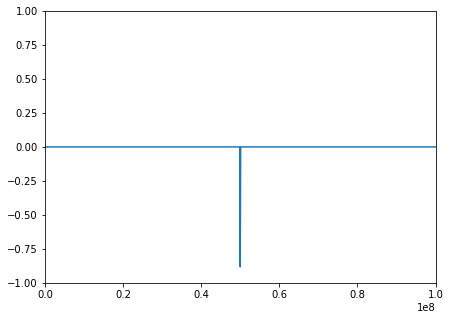

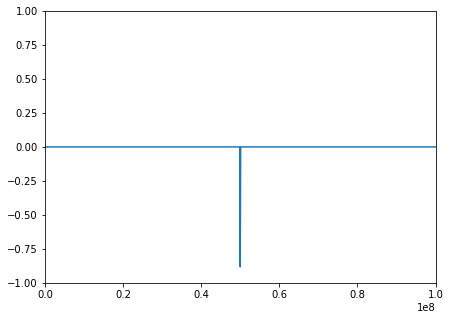

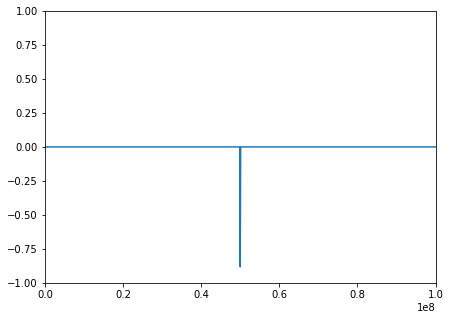

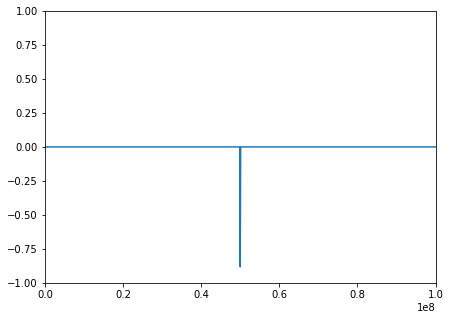

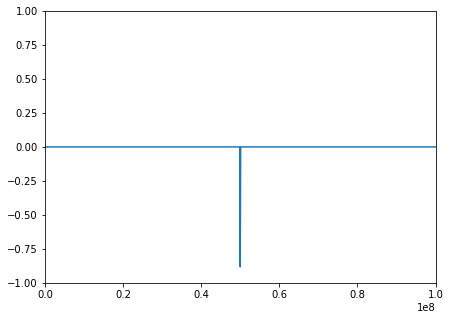

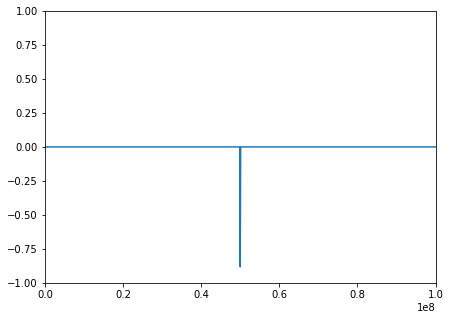

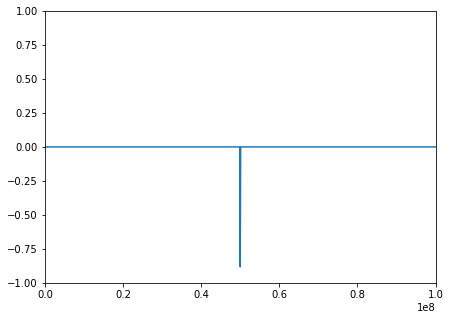

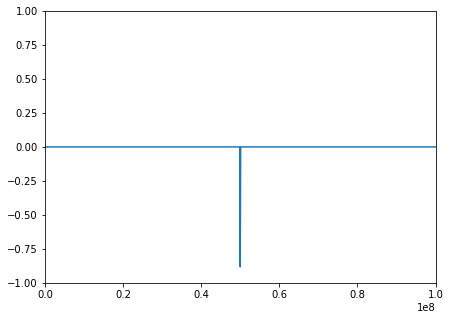

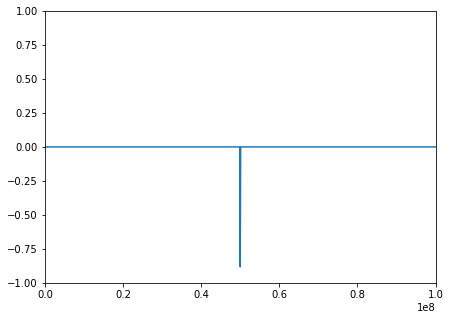

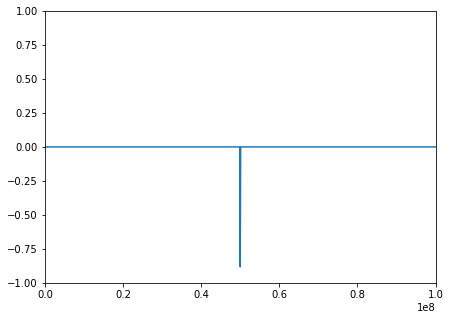

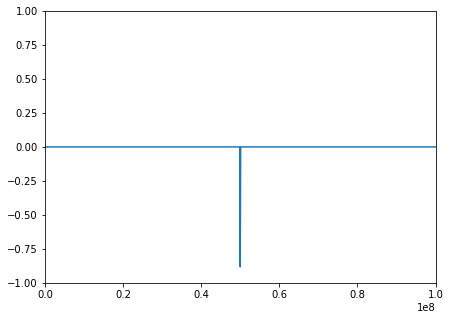

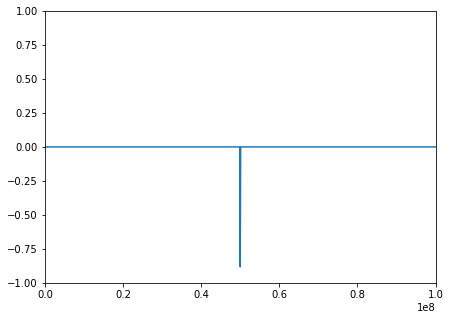

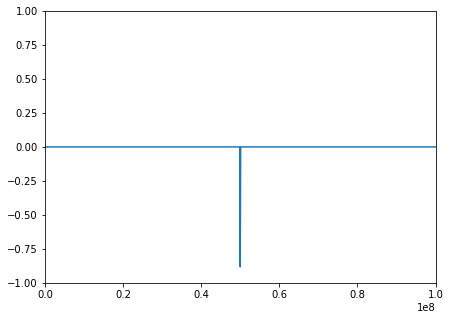

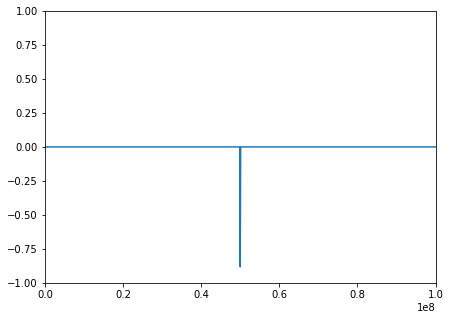

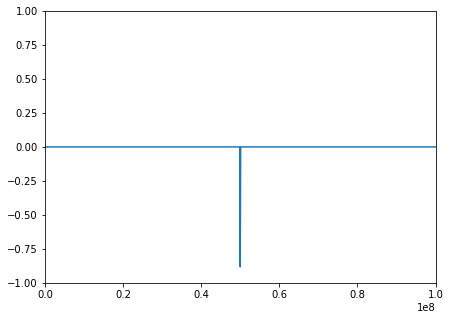

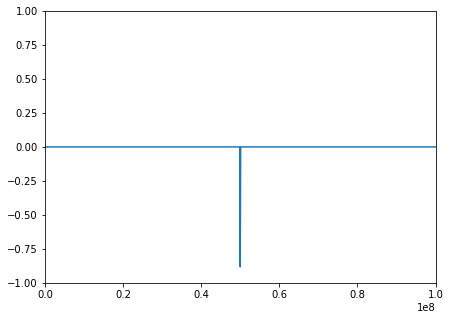

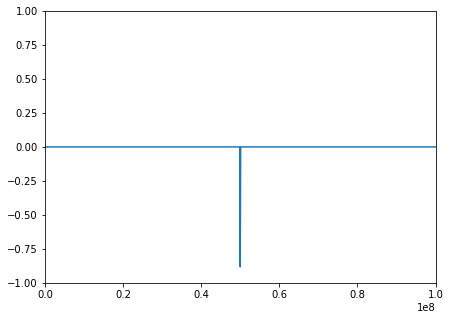

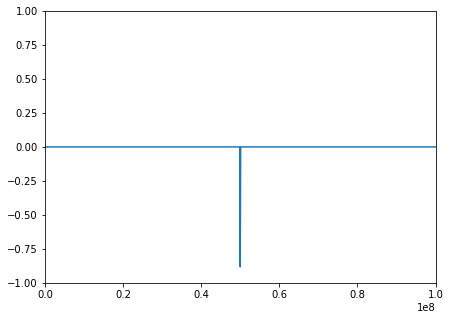

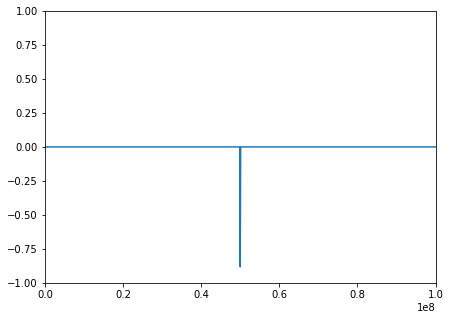

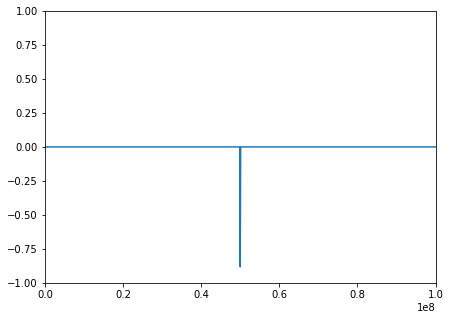

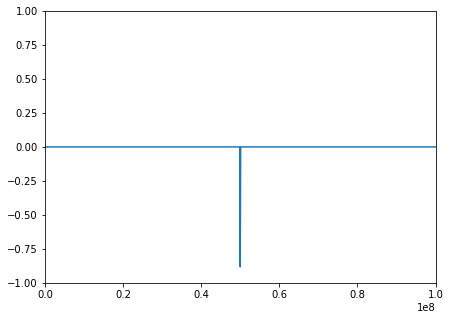

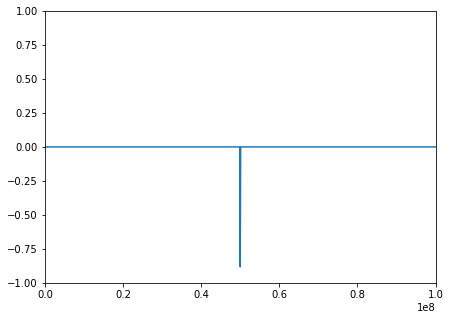

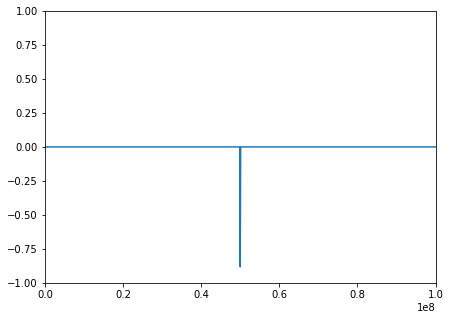

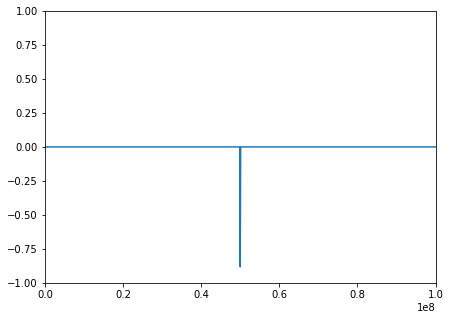

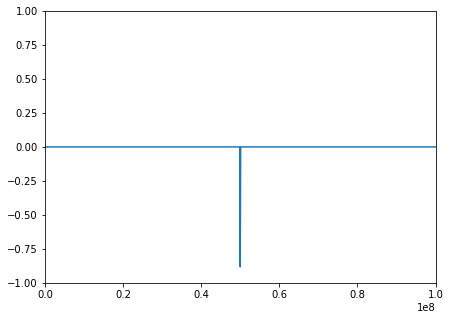

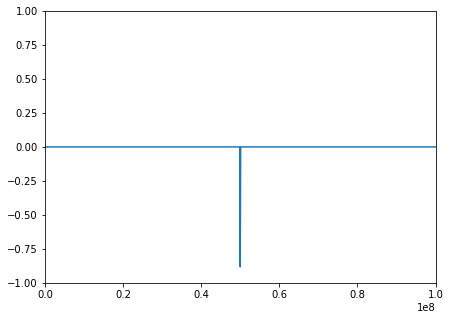

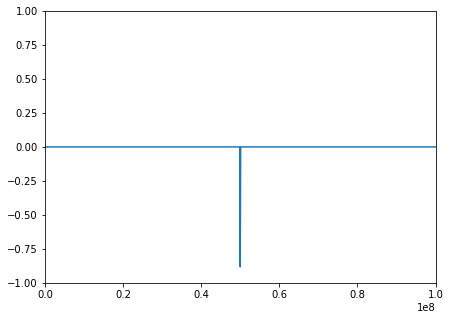

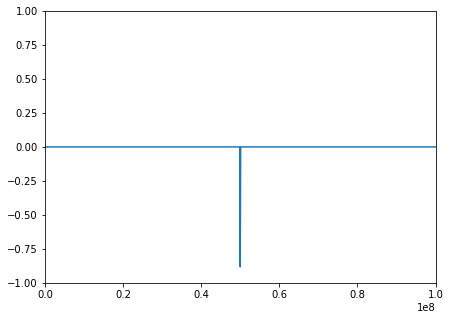

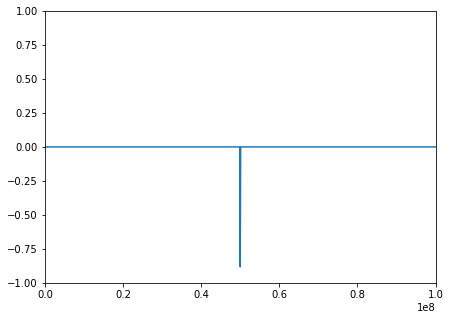

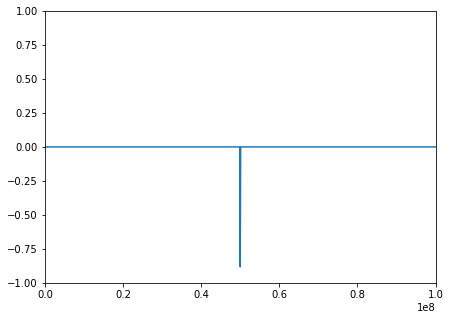

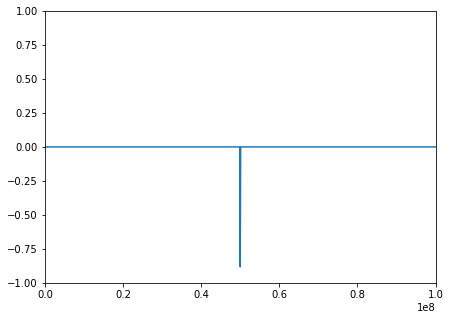

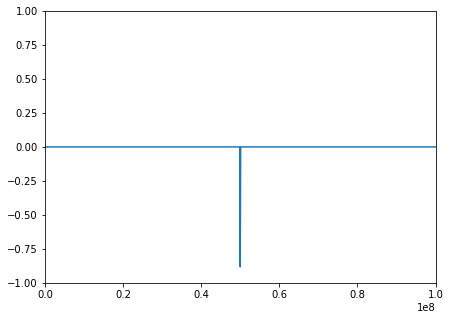

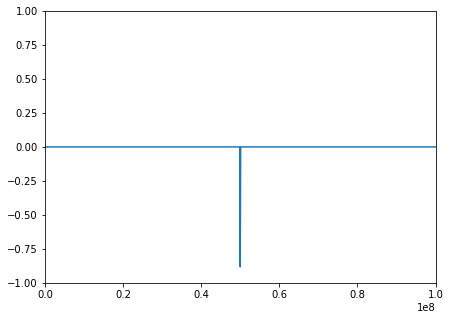

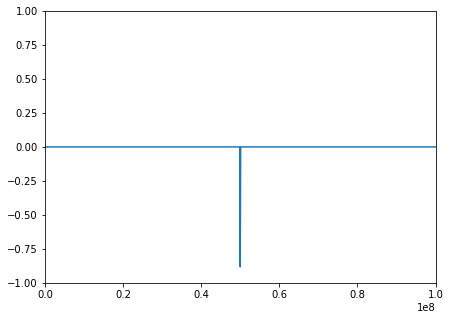

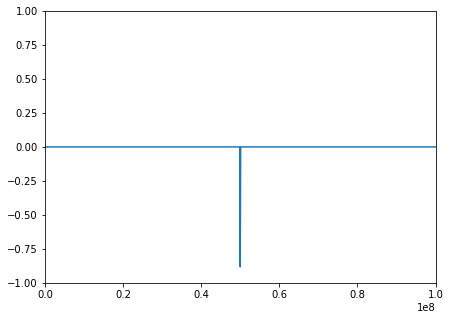

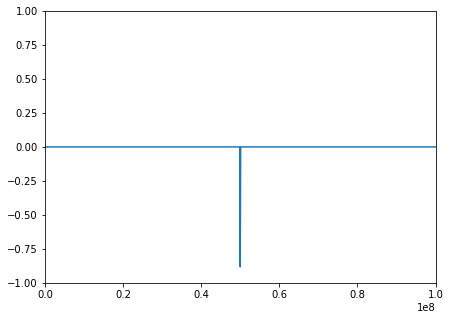

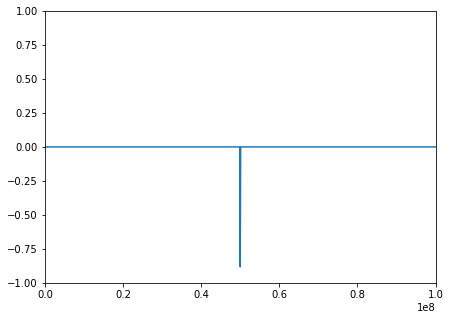

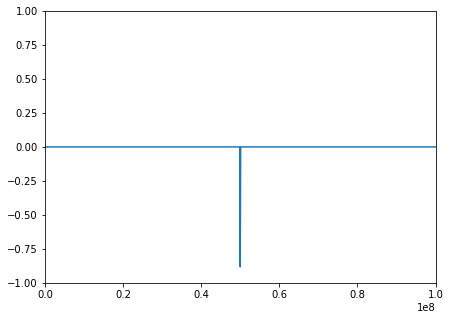

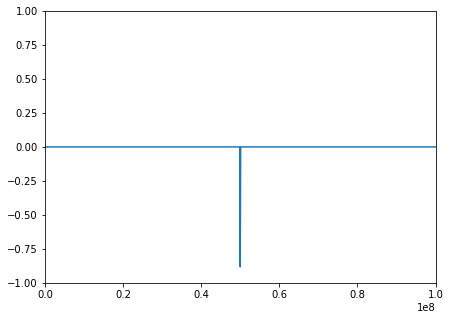

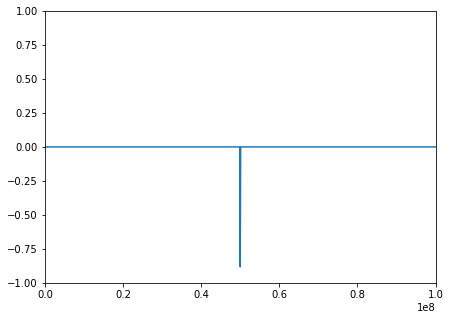

In [46]:
tmax = 1e-14
framerate = 500
for i,t in enumerate(np.arange(0, tmax, 5e-19)):
    v = b2*psi[0:N-1] + b1*psi[1:N] + b2*psi[2:N+1]
    psi[1:N] = banded(A,v,1,1)
    
    if i%framerate == 0:
        y = np.real(psi)
        fig,ax = plt.subplots(1, 1, figsize = (7,5))
        plt.plot(x,y)
        ax.set_xlim(0,L)
        ax.set_ylim(-1,1)
        plt.show()